In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample time series dataset
# You can replace this with your own time series data
# Ensure that the data is in a NumPy array or a list
time = np.arange(0, 10, 0.01)  # Time values from 0 to 10 with a step of 0.01
signal = 2 * np.sin(2 * np.pi * 1 * time) + 1 * np.sin(2 * np.pi * 2 * time)

# Plot the original time series
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Perform the Fourier Transform
fourier_transform = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), 0.01)  # Frequency values (assuming a sampling interval of 0.01)

# Plot the magnitude of the Fourier Transform
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fourier_transform))
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 5)  # Limit the x-axis to show frequencies up to 5 Hz

plt.tight_layout()
plt.show()

In [ ]:
import pkg_resources

def get_library_versions(libraries):
    with open('../requirements.txt', 'w') as f:
        for library in libraries:
            try:
                version = pkg_resources.get_distribution(library).version
                f.write(f"{library}=={version}\n")
            except pkg_resources.DistributionNotFound:
                print(f"{library} is not installed")

# Liste des bibliothèques à vérifier
libraries = ["numpy", "pandas", "scikit-learn", "scipy", 
             "seaborn", "tensorflow", "keras", "matplotlib", 'imblearn']

get_library_versions(libraries)

----------------------------------------------------------------------------------------------------------

In [1]:
FILE_PATH = '../data/predictive_maintenance_A.csv'

import pandas as pd

import sys
sys.path.insert(0, '../Src/')

from Function_preprocess import preprocess
df = pd.read_csv(FILE_PATH, index_col='UDI')


In [ ]:
import pkg_resources

def get_version(package_name):
    try:
        return pkg_resources.get_distribution(package_name).version
    except pkg_resources.DistributionNotFound:
        return "Le package n'est pas installé"

print(get_version("keras"))

==============================================================================================================================

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Charger le jeu de données Iris
iris = load_iris()
X = iris.data
y = iris.target

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer une instance de LogisticRegression
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Entraîner le modèle
logreg.fit(X_train, y_train)

# Prédire les classes pour l'ensemble de test
y_pred = logreg.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)

print(f'Précision du modèle: {accuracy}')

Précision du modèle: 1.0


In [3]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binariser les étiquettes dans un format one-vs-all pour l'utilisation avec roc_auc_score
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = logreg.predict_proba(X_test)

# Calculer l'AUC pour chaque classe
auc = roc_auc_score(y_test_bin, y_pred_bin, multi_class='ovr')

print(f'AUC: {auc}')

AUC: 1.0


In [1]:
!pip install python-box==6.0.2


     ---------------------------------------- 0.0/941.8 kB ? eta -:--:--
     - ------------------------------------- 30.7/941.8 kB 1.4 MB/s eta 0:00:01
     ----------- -------------------------- 276.5/941.8 kB 2.4 MB/s eta 0:00:01
     ------------------------------ ------- 747.5/941.8 kB 5.3 MB/s eta 0:00:01
     -------------------------------------- 941.8/941.8 kB 5.0 MB/s eta 0:00:00


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


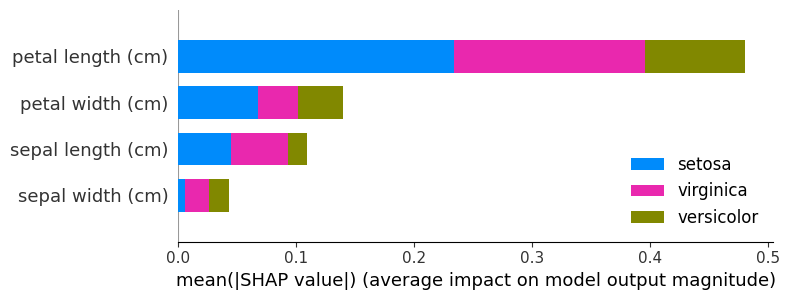

In [7]:
import shap
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Charger les données
iris = load_iris()
X = iris.data
y = to_categorical(iris.target)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, verbose=0)

# Utiliser le Deep Explainer SHAP
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]
explainer = shap.DeepExplainer(model, background)

# Calculer les valeurs SHAP
shap_values = explainer.shap_values(background)

# Afficher le résumé du tracé
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=iris.feature_names, class_names=iris.target_names)

In [1]:
import os
import joblib
os.chdir('..')

from Src.config import configuration
cfg = configuration.config_manager().get_path()

[2024-02-01 21:51:16,110: INFO: common: yaml file: Config\path.yaml loaded successfully]
[2024-02-01 21:51:16,110: INFO: common: created directory at: workdir]
[2024-02-01 21:51:16,110: INFO: common: created directory at: workdir/model]


In [2]:
file_transformer = './'+cfg.config_path.work_dir+'/transformer.pkl'
ct_X_ = joblib.load(file_transformer)

In [7]:
import numpy as np
import pandas as pd
tab = np.array(['z', '0', '0', '0', '0', '0', '0', '0'])
tab = pd.DataFrame(tab.reshape(1, -1), columns=ct_X_.feature_names_in_)
#tab.columns = ct_X_.feature_names_in_
#tab.columns = ['Type', 'Air temperature [K]', 'Process temperature [K]',
#       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
#       'Difference temperature [K]', 'Power']


In [24]:
print(ct_X_.feature_names_in_)    

['Type' 'Air temperature [K]' 'Process temperature [K]'
 'Rotational speed [rpm]' 'Torque [Nm]' 'Tool wear [min]'
 'Difference temperature [K]' 'Power']


In [8]:
print(tab)

  Type Air temperature [K] Process temperature [K] Rotational speed [rpm]  \
0    z                   0                       0                      0   

  Torque [Nm] Tool wear [min] Difference temperature [K] Power  
0           0               0                          0     0  


In [9]:
ct_X_.transform(tab)

ValueError: Found unknown categories ['z'] in column 0 during transform